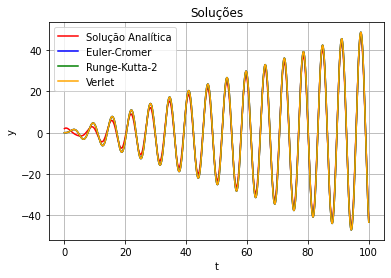

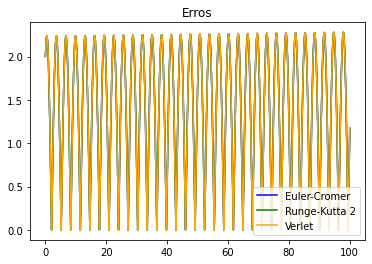

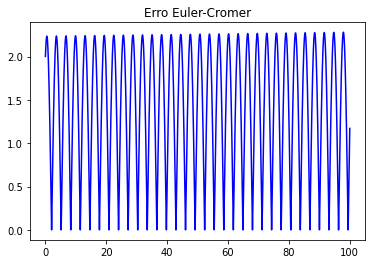

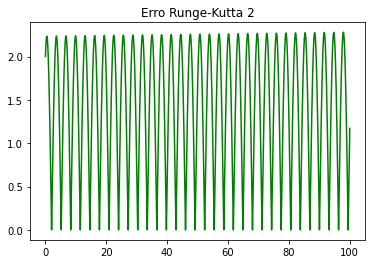

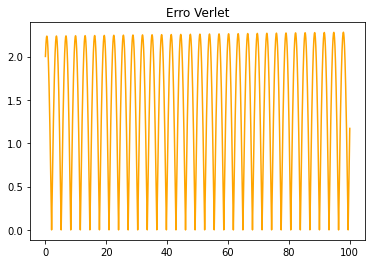

In [1]:
"""
Definindo a EDO linear de segunda ordem:
  y'' + y = sin(t) 
  com problema de valor inicial:
  y(0) = 2 
  y'(0) = 1

Solução Analítica:
  Sg --> y = yh + yp
  yh --> y'' - y = 0 --> yh = c1*cos(t) + c2*sin(t)
  yp --> y'' - y = sin(t) --> yp = -t*cos(t)/2
  y = (c1*cos(t) + cs*sin(t)) - (t*cos(t)/2)
  aplicar condições iniciais:
   // y = 2*cos(t) + 1.5*sin(t) - t*cos(t)/2 //
"""
import numpy as np
import matplotlib.pyplot as plt

n = 100001            #definindo o intervalo n
ta = np.zeros(100001)         #array para os valores de t p/ a sol. analítica

for i in range(0,n):
 ta[i] = ta[-1] + 1/1000

"""Na parte dos métodos acabei reescrevendo t pois 
estava dando erro nos loops 'while'."""

#solução analítica

def sol_a(ta):    # y = 2*cos(t) + 1.5*sin(t) - t*cos(t)/2
  return 2*np.cos(ta) + 1.5*np.sin(ta) - ta*np.cos(ta)/2

def ana(ta,n):
  y = np.zeros(n)          
  for i in range(0,n):        
    ta[i] = 1/1000 + ta[i-1]
    y[i] = sol_a(ta[i])
  return y

analitica = ana(ta, n)

# Métodos:

h = 1/1000          #valor de h
tf = 100            #Intervalo do eixo x
t = [0]             #t inicial
X = [0]
U = [0]

def func():
  return np.sin(t[-1]) - X[-1]   # y'' + y = sin(t) 

# Euler_Cromer:
def E_C():
    while tf > t[-1]:
        ui = U[-1] + func() * h
        xi = X[-1] + ui * h
        U.append(ui)
        X.append(xi)
        t.append(t[-1]+h)
    E = np.array(X)
    T = np.array(t)
    return T, E

T, E = E_C()

# Runge_Kutta_2:

def R_K_2():
    while tf > t[-1]: 
      k1x = U[-1] * h
      k1u = h * func()
      ui = U[-1] + 0.5 * k1u
      k2x = h * ui
      xi = X[-1] + 0.5*(k1x + k2x) 
      X.append(xi)
    R = np.array(X)    
    return T, R

T,R = R_K_2()

# Verlet:

def Ver():
    while tf > t[-1]: 
      xi = 2 * X[-1] - X[-2] + func() * h ** 2
      X.append(xi)
    V = np.array(X)
    return T, V

T, V = Ver()

#Gráfico das Soluções:
plt.figure()
plt.plot(ta,analitica,label='Solução Analítica',c='red')
plt.plot(T,E,label='Euler-Cromer',c='blue')
plt.plot(T,R,label='Runge-Kutta-2',c='green')
plt.plot(T,V,label='Verlet',c='orange')
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Soluções') 
plt.savefig('GraficoSolucoes')

#Erros:
e_E = abs(np.subtract(analitica,E))    #Erro Euler-Cromer
e_R = abs(np.subtract(analitica,R))    #Erro Runge-Kutta 2
e_V = abs(np.subtract(analitica,V))    #Erro Verlet


#Gráficos dos erros:

plt.figure()
plt.plot(t,e_E,label='Euler-Cromer',c='blue')
plt.plot(t,e_R,label='Runge-Kutta 2',c='green')
plt.plot(t,e_V,label='Verlet',c='orange')
plt.legend()
plt.title('Erros')
plt.savefig('Erros')

plt.figure()
plt.plot(t,e_E,label='Euler-Cromer',c='blue')
plt.title('Erro Euler-Cromer')
plt.savefig('Erro_Euler')

plt.figure()
plt.plot(t,e_R,label='Runge-Kutta 2',c='green')
plt.title('Erro Runge-Kutta 2')
plt.savefig('Erro_RK2')

plt.figure()
plt.plot(t,e_V,label='Verlet',c='orange')
plt.title('Erro Verlet')
plt.savefig('Erro_Verlet')
